<a href="https://colab.research.google.com/github/MedulHasan/Machine-Learning/blob/master/DES(Decision_Tree_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('DSE-Data-Archive-February-to-date.csv')
df.head()

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
0,1,8/20/2020,1JANATAMF,4.8,4.9,4.7,4.8,4.8,4.8,178,4.062,"852,763"
1,2,8/19/2020,1JANATAMF,4.9,5,4.7,4.7,4.8,4.7,241,7.355,"1,504,368"
2,3,8/18/2020,1JANATAMF,4.7,4.9,4.6,4.7,4.7,4.8,252,6.302,"1,323,469"
3,4,8/17/2020,1JANATAMF,4.6,5,4.6,4.7,4.8,4.6,398,12.461,"2,554,171"
4,5,8/16/2020,1JANATAMF,4.6,4.6,4.2,4.2,4.6,4.2,304,11.186,"2,481,973"


In [ ]:
#df['TRADING_CODE'].unique()

In [ ]:
df_fig = ['MTB']
fig = df[(df['TRADING_CODE'].isin(df_fig))]
fig

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME
21190,21191,8/20/2020,MTB,24.4,24.7,24.3,24.4,24.4,24.2,133,6.816,"278,651"
21191,21192,8/19/2020,MTB,24.2,25.5,24.1,25.4,24.2,24.7,281,12.668,"513,919"
21192,21193,8/18/2020,MTB,24.7,25.3,24.5,25.3,24.7,25.2,206,5.958,"241,033"
21193,21194,8/17/2020,MTB,25.5,27,25.1,25.7,25.2,25.5,300,17.480,"682,877"
21194,21195,8/16/2020,MTB,25.5,26.8,25.1,25.1,25.5,25,346,18.721,"728,682"
...,...,...,...,...,...,...,...,...,...,...,...,...
21280,21281,2/6/2020,MTB,29.2,30.9,29.1,29.9,29.3,29.5,35,1.551,"53,047"
21281,21282,2/5/2020,MTB,29.6,29.8,29,29.8,29.5,29.5,9,0.352,"11,910"
21282,21283,2/4/2020,MTB,29.1,30.3,28.6,29.3,29.5,29.3,96,3.555,"120,621"
21283,21284,2/3/2020,MTB,29.7,29.9,29,29.8,29.3,30.1,101,3.062,"103,331"


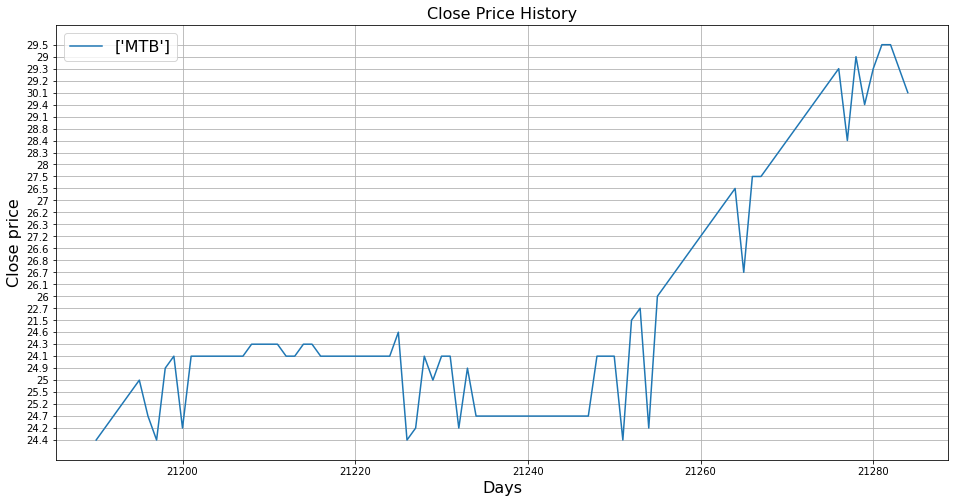

In [ ]:
#visulize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=16)
plt.plot(fig['CLOSEP*'], label=df_fig)
plt.legend(loc="upper left", fontsize=16)
plt.xlabel('Days', fontsize=16)
plt.ylabel(('Close price'), fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
df.isnull().sum()

ID              0
DATE            0
TRADING_CODE    0
LTP*            0
HIGH            0
LOW             0
OPENP*          0
CLOSEP*         0
YCP             0
TRADE           0
VALUE (mn)      0
VOLUME          0
dtype: int64

#Data Preprocessing

In [ ]:
dummie = pd.get_dummies(df.TRADING_CODE)
dummie

,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,APEXFOOT,APEXSPINN,APEXTANRY,APOLOISPAT,APSCLBOND,ARAMIT,ARAMITCEM,ARGONDENIM,ASIAINS,ASIAPACINS,ATCSLGF,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55991,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
marge = pd.concat([df, dummie], axis=1)
marge

,ID,DATE,TRADING_CODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,8/20/2020,1JANATAMF,4.8,4.9,4.7,4.8,4.8,4.8,178,4.062,"852,763",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8/19/2020,1JANATAMF,4.9,5,4.7,4.7,4.8,4.7,241,7.355,"1,504,368",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,8/18/2020,1JANATAMF,4.7,4.9,4.6,4.7,4.7,4.8,252,6.302,"1,323,469",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,8/17/2020,1JANATAMF,4.6,5,4.6,4.7,4.8,4.6,398,12.461,"2,554,171",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,8/16/2020,1JANATAMF,4.6,4.6,4.2,4.2,4.6,4.2,304,11.186,"2,481,973",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55989,55990,2/6/2020,ZEALBANGLA,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55990,55991,2/5/2020,ZEALBANGLA,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55991,55992,2/4/2020,ZEALBANGLA,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55992,55993,2/3/2020,ZEALBANGLA,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df = marge.drop(['TRADING_CODE'], axis=1)
final_df

,ID,DATE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1,8/20/2020,4.8,4.9,4.7,4.8,4.8,4.8,178,4.062,"852,763",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,8/19/2020,4.9,5,4.7,4.7,4.8,4.7,241,7.355,"1,504,368",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,8/18/2020,4.7,4.9,4.6,4.7,4.7,4.8,252,6.302,"1,323,469",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,8/17/2020,4.6,5,4.6,4.7,4.8,4.6,398,12.461,"2,554,171",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,8/16/2020,4.6,4.6,4.2,4.2,4.6,4.2,304,11.186,"2,481,973",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55989,55990,2/6/2020,40.1,42.9,40.1,42.9,40.8,40.8,24,0.310,"7,601",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55990,55991,2/5/2020,40.6,42.8,40.1,41.7,40.8,40.5,115,0.633,"15,310",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55991,55992,2/4/2020,40.6,41.9,39.2,41.9,40.5,40.1,9,0.025,615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
55992,55993,2/3/2020,40.4,41.4,38.2,41.4,40.1,40.9,34,0.259,"6,418",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_df  = final_df.replace('[^\d.]', '', regex=True).astype(float)

In [ ]:
final_df.head()

,ID,DATE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1.0,8202020.0,4.8,4.9,4.7,4.8,4.8,4.8,178.0,4.062,852763.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,8192020.0,4.9,5.0,4.7,4.7,4.8,4.7,241.0,7.355,1504368.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,8182020.0,4.7,4.9,4.6,4.7,4.7,4.8,252.0,6.302,1323469.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,8172020.0,4.6,5.0,4.6,4.7,4.8,4.6,398.0,12.461,2554171.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,8162020.0,4.6,4.6,4.2,4.2,4.6,4.2,304.0,11.186,2481973.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.dtypes

ID            float64
DATE          float64
LTP*          float64
HIGH          float64
LOW           float64
               ...   
WMSHIPYARD    float64
YPL           float64
ZAHEENSPIN    float64
ZAHINTEX      float64
ZEALBANGLA    float64
Length: 601, dtype: object

#Splitting the data into train and test set

In [ ]:
x = final_df.drop(['CLOSEP*'], axis=1)
x.head()

,ID,DATE,LTP*,HIGH,LOW,OPENP*,YCP,TRADE,VALUE (mn),VOLUME,1JANATAMF,1STPRIMFMF,AAMRANET,AAMRATECH,ABB1STMF,ABBANK,ACFL,ACI,ACIFORMULA,ACMELAB,ACTIVEFINE,ADNTEL,ADVENT,AFCAGRO,AFTABAUTO,AGNISYSL,AGRANINS,AIBL1STIMF,AIL,AL-HAJTEX,ALARABANK,ALIF,ALLTEX,AMANFEED,AMBEEPHA,AMCL(PRAN),ANLIMAYARN,ANWARGALV,APEXFOODS,APEXFOOT,...,T5Y1012,T5Y1013,T5Y1014,T5Y1015,T5Y1111,T5Y1112,T5Y1113,T5Y1114,T5Y1115,T5Y1211,T5Y1212,T5Y1213,T5Y1214,T5Y1215,TAKAFULINS,TALLUSPIN,TITASGAS,TOSRIFA,TRUSTB1MF,TRUSTBANK,TUNGHAI,UCB,UNIONCAP,UNIQUEHRL,UNITEDAIR,UNITEDFIN,UNITEDINS,UPGDCL,USMANIAGL,UTTARABANK,UTTARAFIN,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
0,1.0,8202020.0,4.8,4.9,4.7,4.8,4.8,178.0,4.062,852763.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,8192020.0,4.9,5.0,4.7,4.7,4.7,241.0,7.355,1504368.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,8182020.0,4.7,4.9,4.6,4.7,4.8,252.0,6.302,1323469.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,8172020.0,4.6,5.0,4.6,4.7,4.6,398.0,12.461,2554171.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,8162020.0,4.6,4.6,4.2,4.2,4.2,304.0,11.186,2481973.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = final_df.filter(['CLOSEP*'])
y

,CLOSEP*
0,4.8
1,4.8
2,4.7
3,4.8
4,4.6
...,...
55989,40.8
55990,40.8
55991,40.5
55992,40.1


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

#Model Building Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dc_tree = DecisionTreeRegressor()

In [ ]:
dc_tree.fit(xtrain, ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
dc_tree_score = dc_tree.score(xtest, ytest)
print("Tree Score: ", dc_tree_score)

Tree Score:  0.9999999395620232


In [ ]:
dcTree_pred = dc_tree.predict(xtest)
dcTree_pred

array([22.6,  0. , 69.3, ..., 55.4,  1.9,  0. ])

In [ ]:
dcTree_compare = ytest
dcTree_compare['prediction'] = dcTree_pred
dcTree_compare.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CLOSEP*,prediction
12626,22.6,22.6
47040,0.0,0.0
15136,70.4,69.3
23768,9.2,9.0
12129,10.2,10.2
